

Dimensionality Reduction

SEST1


---

## PCA (3 points)

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
# import the 'iris.csv' data
df1 = pd.read_csv('iris.csv')
df= df1.copy()
df.pop("Id")

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [2]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Calculation

In [3]:
# create the variable X, which contains 4 features :
# 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
X=df
X.pop("Species")

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [4]:
x_mds=X.copy()

In [5]:
X=X.to_numpy()

In [6]:
# demean the X
X[:,0] = X[:,0] - X[:,0].mean()
X[:,1] = X[:,1] - X[:,1].mean()
X[:,2] = X[:,2] - X[:,2].mean()
X[:,3] = X[:,3] - X[:,3].mean()

In [7]:
# transpose the matrix X
X = X.transpose()

In [8]:
# create the covariance matrix of X (use the transposed X)
C = np.cov(X).round(decimals = 2)
C

array([[ 0.69, -0.04,  1.27,  0.52],
       [-0.04,  0.19, -0.32, -0.12],
       [ 1.27, -0.32,  3.11,  1.3 ],
       [ 0.52, -0.12,  1.3 ,  0.58]])

In [9]:
# calculate the variance of each x in X (x1, x2, x3, x4)
x1_var = C[0][0]
x2_var = C[1][1]
x3_var = C[2][2]
x4_var = C[3][3]

In [10]:
# calculate the total variance of X
total_var = x1_var + x2_var+ x3_var + x4_var 
total_var

4.569999999999999

In [11]:
k=x1_var/total_var
k2=x2_var/total_var
k3=x3_var/total_var
k4=x4_var/total_var

<BarContainer object of 4 artists>

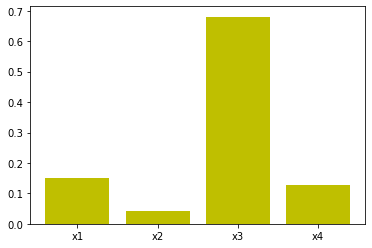

In [12]:
# show the bar chart with share of every variance in total variance
# how much each of x explains the total variance
plt.bar(x= ["x1", "x2", "x3", "x4"], height = [k, k2, k3, k4], color= "y")

In [13]:
# calculate the Eigenvalues and Eigenvectors of Covariance Matrix
EigenValues, V = np.linalg.eig(C)
EigenValues

array([4.2234428 , 0.24478469, 0.07856829, 0.02320423])

In [14]:
# sort the Eigenvalues (in descending order)
ord = np.argsort(EigenValues[::-1])
ord

array([0, 1, 2, 3], dtype=int64)

In [15]:
# sort the Eigenvectors columns in the same order as Eigenvalues
# V[:, ord]
V = V[:, ord]
V

array([[ 0.3616073 , -0.66202103, -0.60792098,  0.24779103],
       [-0.08221617, -0.72402918,  0.6339121 , -0.25918661],
       [ 0.85616755,  0.17875144,  0.12353081, -0.46879119],
       [ 0.35980243,  0.07455077,  0.46187409,  0.80725258]])

In [16]:
X = X.transpose()

In [17]:
# Calculate the Principal Components by multiplying the Eigenvectors by X
X_new = np.matmul(X, V)

In [18]:
X_new=  X_new.transpose()

In [19]:
# create the covariance matrix of Principal Components (use the transposed PCs)
C = np.cov(X_new).round(decimals = 2)
C

array([[ 4.22,  0.  , -0.  , -0.  ],
       [ 0.  ,  0.24, -0.  ,  0.  ],
       [-0.  , -0.  ,  0.08,  0.01],
       [-0.  ,  0.  ,  0.01,  0.02]])

In [20]:
# calculate the variance of each component in PCs (PC1, PC2, PC3, PC4)
x1_var = C[0][0]
x2_var = C[1][1]
x3_var = C[2][2]
x4_var = C[3][3]

In [21]:
# calculate the total variance of PCs
total_var= x1_var+ x2_var+ x3_var+ x4_var

In [22]:
k=x1_var/total_var
k2=x2_var/total_var
k3=x3_var/total_var
k4=x4_var/total_var

<BarContainer object of 4 artists>

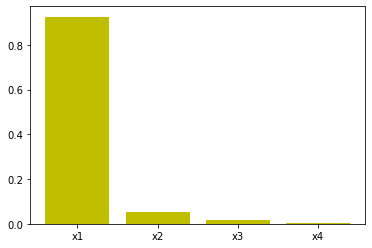

In [23]:
# show the bar chart with share of every variance in total variance
# how much each of component explains the total variance
plt.bar(x= ["x1", "x2", "x3", "x4"], height = [k, k2, k3, k4], color= "y")

In [24]:
df1['Species'].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [25]:
# how many components can we leave and why?
df1['Species']= df1['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2 }).astype(int)


In [26]:
df1['Species'].unique()

array([0, 1, 2])

In [27]:
X_new=  X_new.transpose()

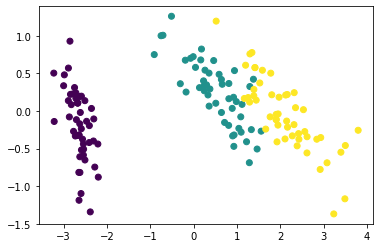

In [28]:
# show the plot using the first two components
# show the colors using the Species (df['Species'])
plt.scatter(X_new[:,0],X_new[:,1], c=df1['Species'])

#### Compare the results with sklearn PCA algorithm

In [29]:
# do the same with PCA algorithm implemented in sklearn
from sklearn.decomposition import PCA

In [30]:
X_pred = PCA().fit_transform(X)

In [31]:
X_pred.shape

(150, 4)

In [32]:
np.cov(X_pred[:,0], X_pred[:,1]).round(decimals = 2)

array([[4.22, 0.  ],
       [0.  , 0.24]])

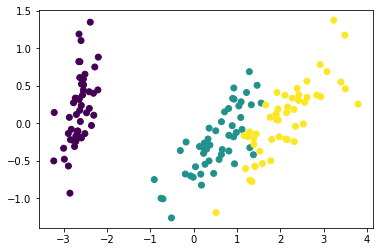

In [33]:
plt.scatter(X_pred[:,0], X_pred[:,1], c=df1['Species'])

In [34]:
x_mds


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
x_mds= x_mds.to_numpy()

In [36]:
# demean the X
x_mds[:,0] = x_mds[:,0] - x_mds[:,0].mean()
x_mds[:,1] = x_mds[:,1] - x_mds[:,1].mean()
x_mds[:,2] = x_mds[:,2] - x_mds[:,2].mean()
x_mds[:,3] = x_mds[:,3] - x_mds[:,3].mean()

In [37]:
x_mds

array([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
        -9.98666667e-01],
       [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
        -9.98666667e-01],
       [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
        -9.98666667e-01],
       [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
        -7.98666667e-01],
       [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
        -8.98666667e-01],
       [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
        -1.09866667e+00],
       [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.04333333e+00,  3.46000000e-01, -2.15866667e+00,
      

## Multidimensional Scaling (MDS) (1 point)

In [38]:
# use the demeaned data (X) to calculate 2 components
# using the MDS algorithm
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_data = mds.fit_transform(x_mds)

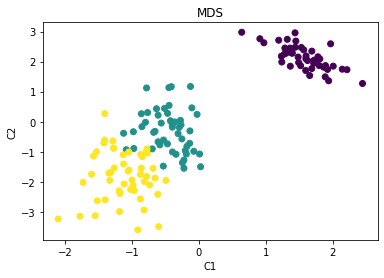

In [39]:
# show the plot using the two components
# show the colors using the Species (df['Species'])
plt.scatter(x = mds_data[:, 0], y = mds_data[:, 1], c=df1["Species"])
plt.title('MDS')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()

## t-SNE (1 point)

In [40]:
# use the demeaned data (X) to calculate 2 components
# using the t-SNE algorithm
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
model= TSNE(n_components=2)
y_pred1= model.fit_transform(x_mds)

In [41]:
y_pred1

array([[  9.362974 , -21.776573 ],
       [  8.311808 , -24.354097 ],
       [  9.508311 , -24.188305 ],
       [  9.106802 , -24.657156 ],
       [  9.616685 , -21.709923 ],
       [  8.878421 , -19.646883 ],
       [  9.903306 , -24.010927 ],
       [  8.902019 , -22.422213 ],
       [  9.15848  , -25.402332 ],
       [  8.550206 , -23.773865 ],
       [  9.465879 , -20.302944 ],
       [  8.535263 , -23.01651  ],
       [  8.58645  , -24.576763 ],
       [  9.768442 , -25.496866 ],
       [ 10.16536  , -19.249922 ],
       [  9.68718  , -18.841719 ],
       [  9.884937 , -19.848234 ],
       [  9.16942  , -21.701109 ],
       [  8.973879 , -19.295536 ],
       [  9.1708355, -20.566172 ],
       [  8.191905 , -20.861511 ],
       [  8.967917 , -20.883425 ],
       [ 10.665264 , -23.803263 ],
       [  7.810461 , -21.969921 ],
       [  7.586452 , -22.927496 ],
       [  7.897056 , -23.879759 ],
       [  8.26674  , -22.133232 ],
       [  9.0232725, -21.37138  ],
       [  9.1802025,

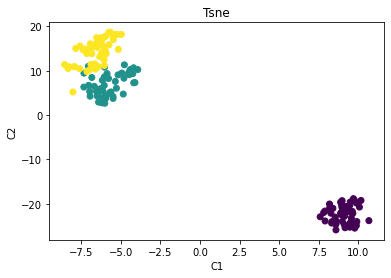

In [42]:
# show the plot using the two components
# show the colors using the Species (df['Species'])
plt.scatter(x = y_pred1[:, 0], y = y_pred1[:, 1], c=df1['Species'])
plt.title('Tsne')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()